### Load Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from IPython.display import display

import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

%matplotlib inline

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("train.csv", index_col = "id")
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
id,,,,,,,,,,,,,,,,,,,,,
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,...,80,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,...,80,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,...,80,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,...,80,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,...,80,0,31,0,3,31,14,4,10,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1677 entries, 0 to 1676
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1677 non-null   int64 
 1   BusinessTravel            1677 non-null   object
 2   DailyRate                 1677 non-null   int64 
 3   Department                1677 non-null   object
 4   DistanceFromHome          1677 non-null   int64 
 5   Education                 1677 non-null   int64 
 6   EducationField            1677 non-null   object
 7   EmployeeCount             1677 non-null   int64 
 8   EnvironmentSatisfaction   1677 non-null   int64 
 9   Gender                    1677 non-null   object
 10  HourlyRate                1677 non-null   int64 
 11  JobInvolvement            1677 non-null   int64 
 12  JobLevel                  1677 non-null   int64 
 13  JobRole                   1677 non-null   object
 14  JobSatisfaction         

In [5]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [6]:
# Check for Missing values

df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition 

In [7]:
# Check the shape of the Data

df.shape

(1677, 34)

In [8]:
# Check statistical analysis of data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0
JobSatisfaction,1677.0,2.791890,1.097396,1.0,2.0,3.0,4.0,4.0


In [9]:
# Check for duplicates in data

df.duplicated().any()

False

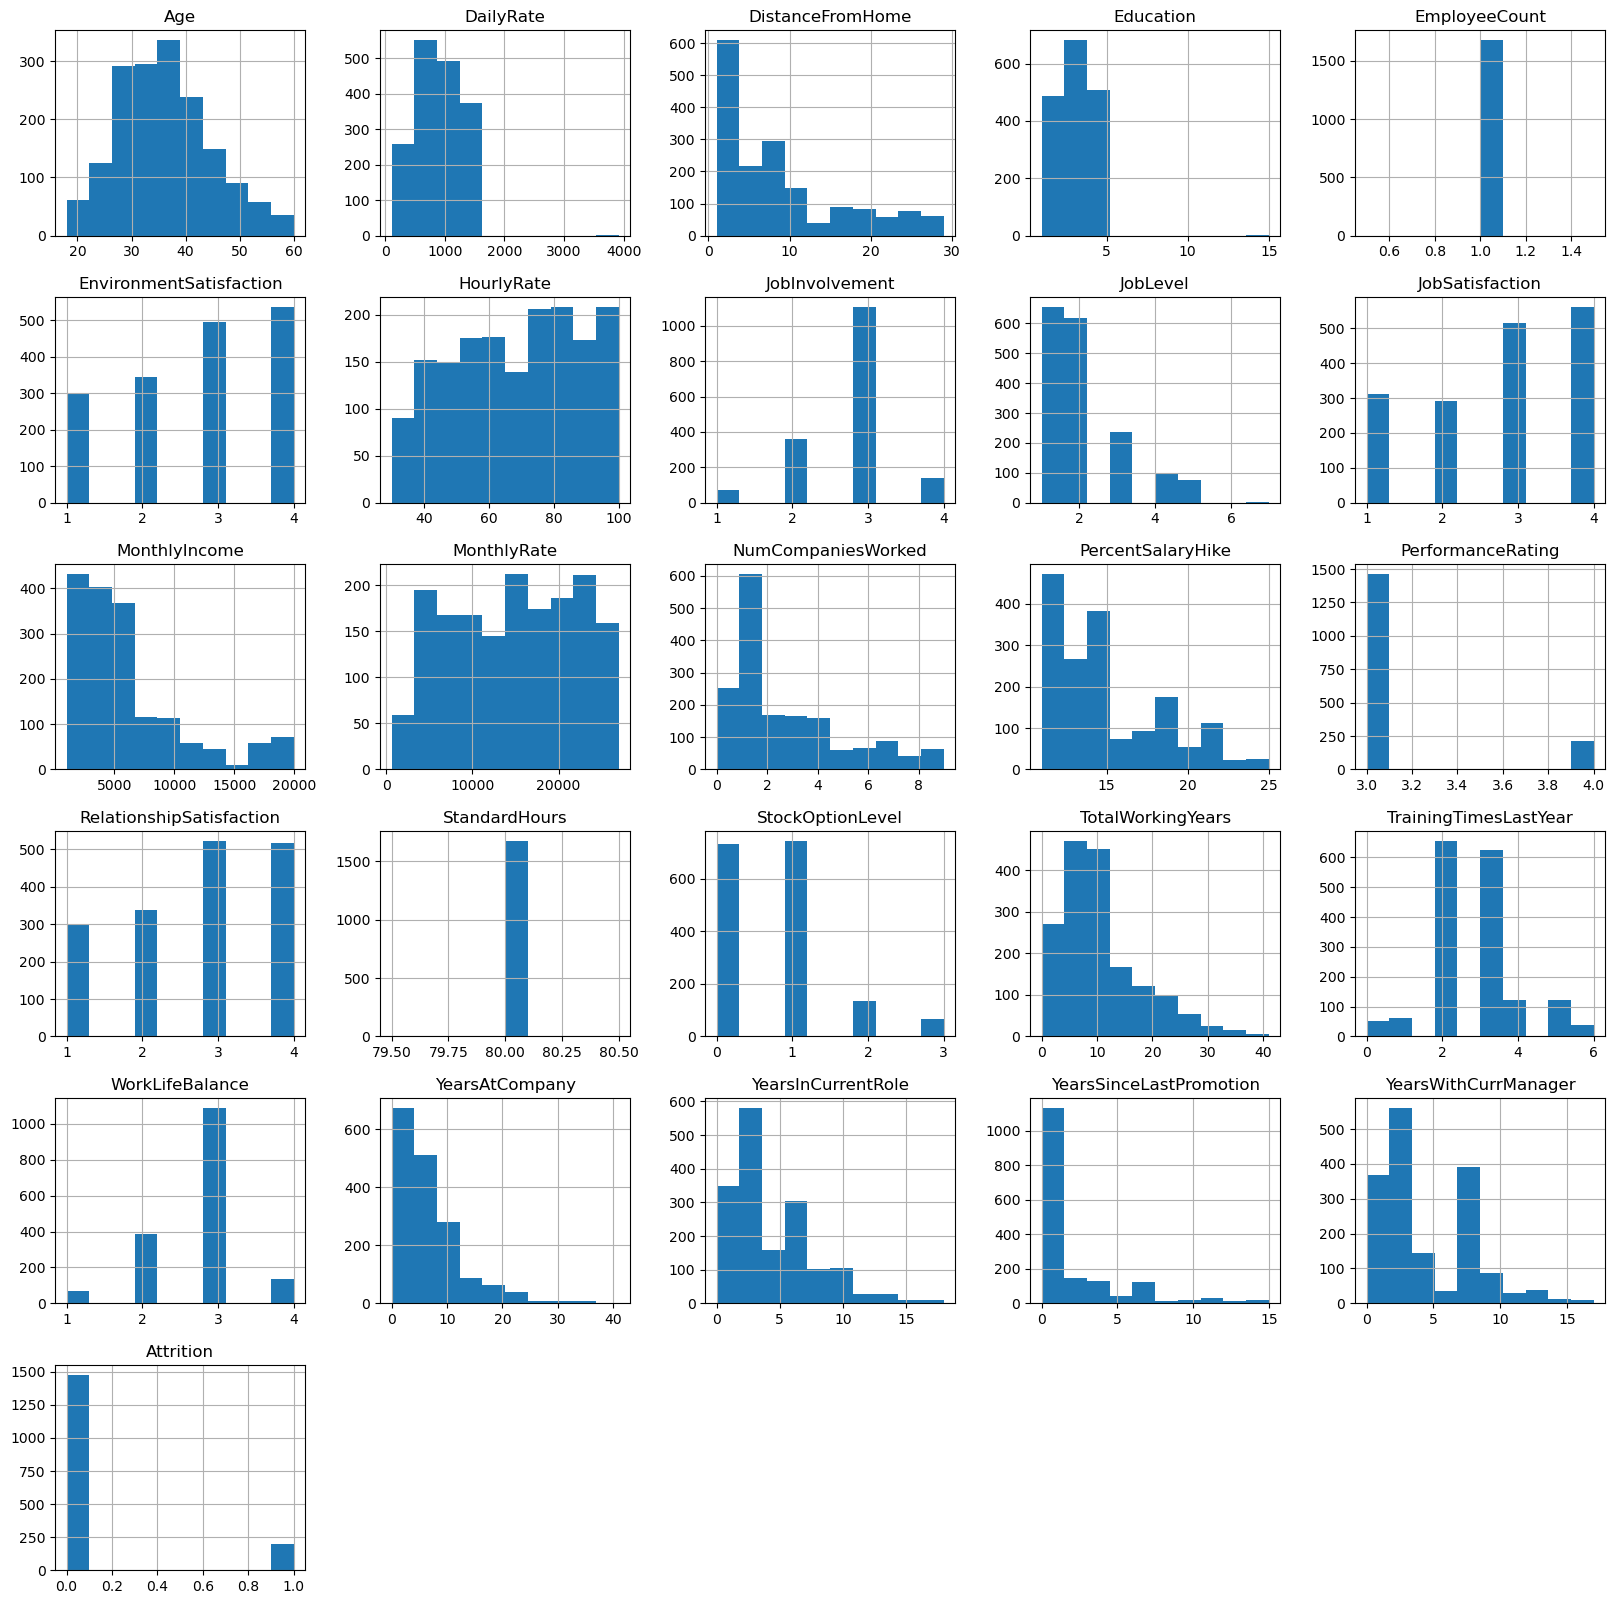

In [10]:
# Check the skewness of the features in the dataset
# Use of chats was selected because of the large number of Features in the dataset

df.hist()  #Ploting Histogram
plt.gcf().set_size_inches(20,20)
plt.show()

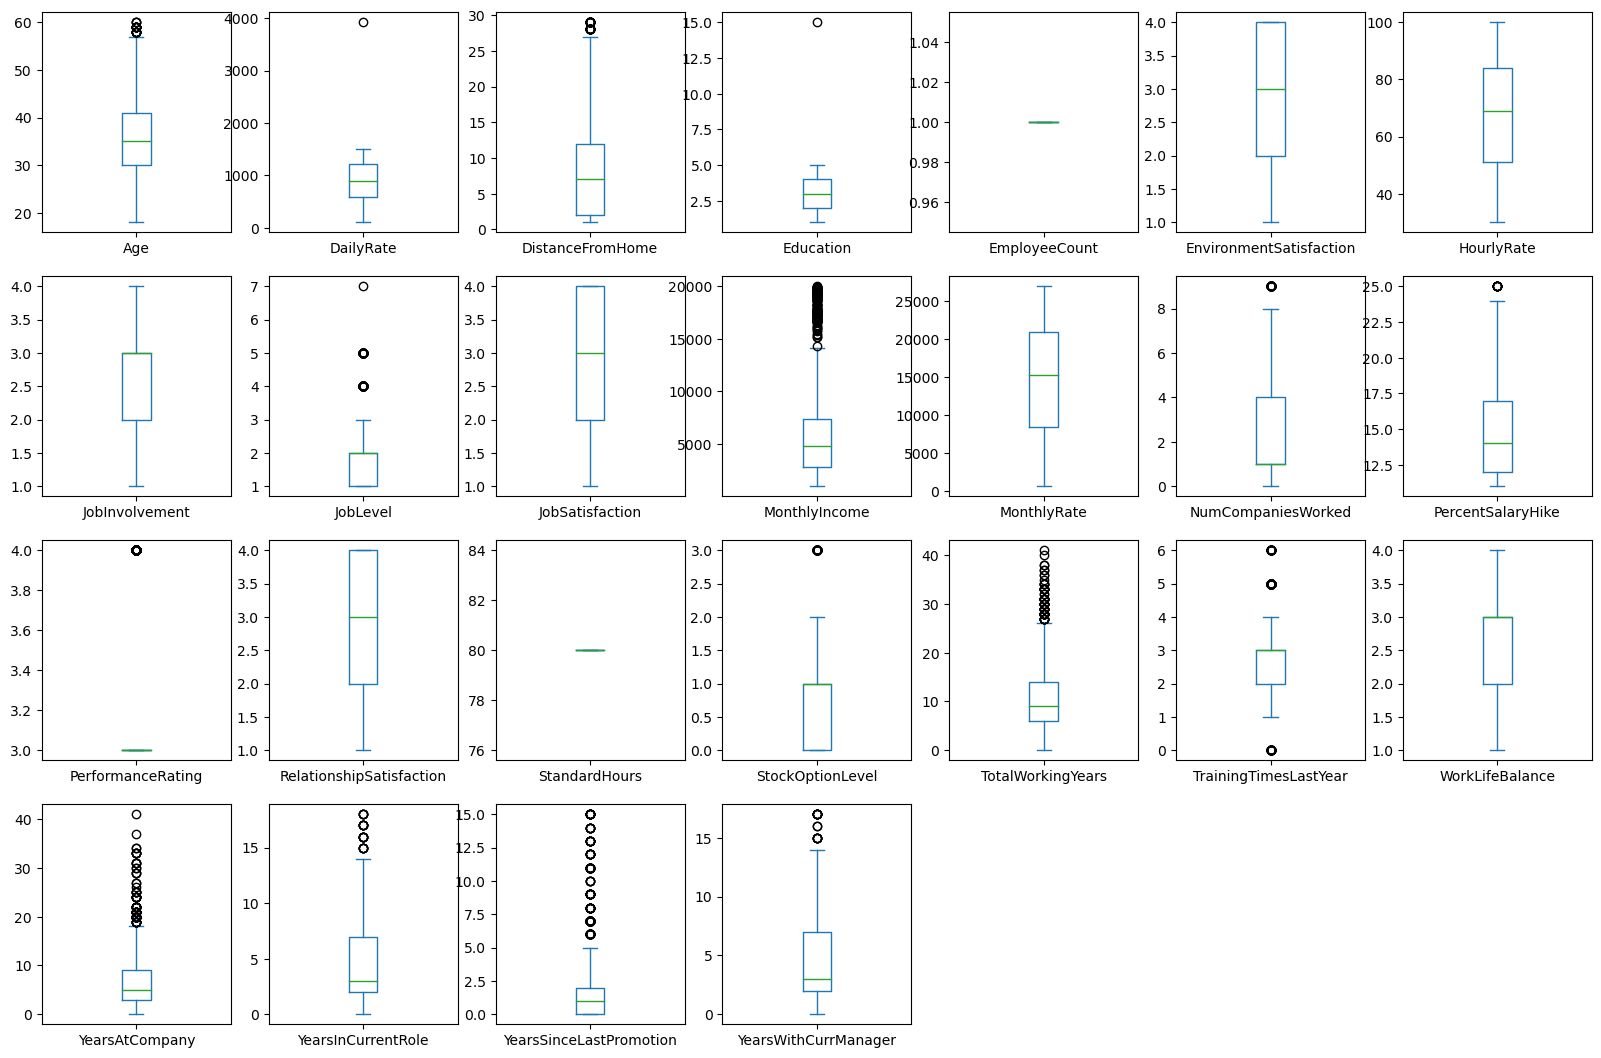

In [3]:
# Check for outliers using box plot

data = df.select_dtypes("number").drop(columns = "Attrition")
data.plot(kind='box', subplots=True, layout=(6,7), sharex=False, sharey=False)
plt.gcf().set_size_inches(20,20)
plt.show()

In [12]:
#Compute correlation

corr = df.select_dtypes("number").drop(columns = "Attrition").corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.039686,-0.049025,0.223545,NaN,0.029557,0.030628,0.002101,0.479015,-0.009273,...,0.056115,NaN,0.064863,0.648047,0.014303,0.034138,0.306628,0.219880,0.204357,0.201601
DailyRate,0.039686,1.000000,0.024168,-0.007035,NaN,0.006483,-0.001213,-0.026725,0.041369,-0.037459,...,0.001315,NaN,0.021273,0.058044,-0.023140,0.025152,0.066057,0.057011,0.037035,0.040969
DistanceFromHome,-0.049025,0.024168,1.000000,-0.011436,NaN,0.004959,0.006191,0.010035,-0.051008,0.026309,...,-0.011868,NaN,0.039086,-0.033573,-0.000239,-0.017184,-0.023564,-0.006670,-0.004215,0.013749
Education,0.223545,-0.007035,-0.011436,1.000000,NaN,-0.011189,0.014862,0.052390,0.085823,-0.030686,...,-0.005253,NaN,0.041722,0.153291,-0.011924,-0.009697,0.116723,0.094065,0.050483,0.109573
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,0.029557,0.006483,0.004959,-0.011189,NaN,1.000000,0.010202,0.014878,0.021551,-0.049272,...,-0.035629,NaN,0.002093,0.022254,-0.028982,0.045387,0.009290,0.016942,0.028711,0.022839
HourlyRate,0.030628,-0.001213,0.006191,0.014862,NaN,0.010202,1.000000,-0.001867,-0.019059,-0.024347,...,-0.035430,NaN,0.058745,-0.024953,0.039878,0.016693,-0.062826,-0.063928,-0.063522,-0.074527
JobInvolvement,0.002101,-0.026725,0.010035,0.052390,NaN,0.014878,-0.001867,1.000000,0.003865,0.035129,...,0.014666,NaN,0.028960,0.001896,-0.018822,0.008476,-0.003354,0.007081,0.015706,0.009519
JobLevel,0.479015,0.041369,-0.051008,0.085823,NaN,0.021551,-0.019059,0.003865,1.000000,-0.022297,...,0.020189,NaN,0.019602,0.762163,-0.029599,0.014067,0.528175,0.401296,0.382727,0.400732
JobSatisfaction,-0.009273,-0.037459,0.026309,-0.030686,NaN,-0.049272,-0.024347,0.035129,-0.022297,1.000000,...,0.016251,NaN,0.010442,-0.033450,0.016980,-0.001117,-0.010760,-0.023463,0.000448,-0.025521


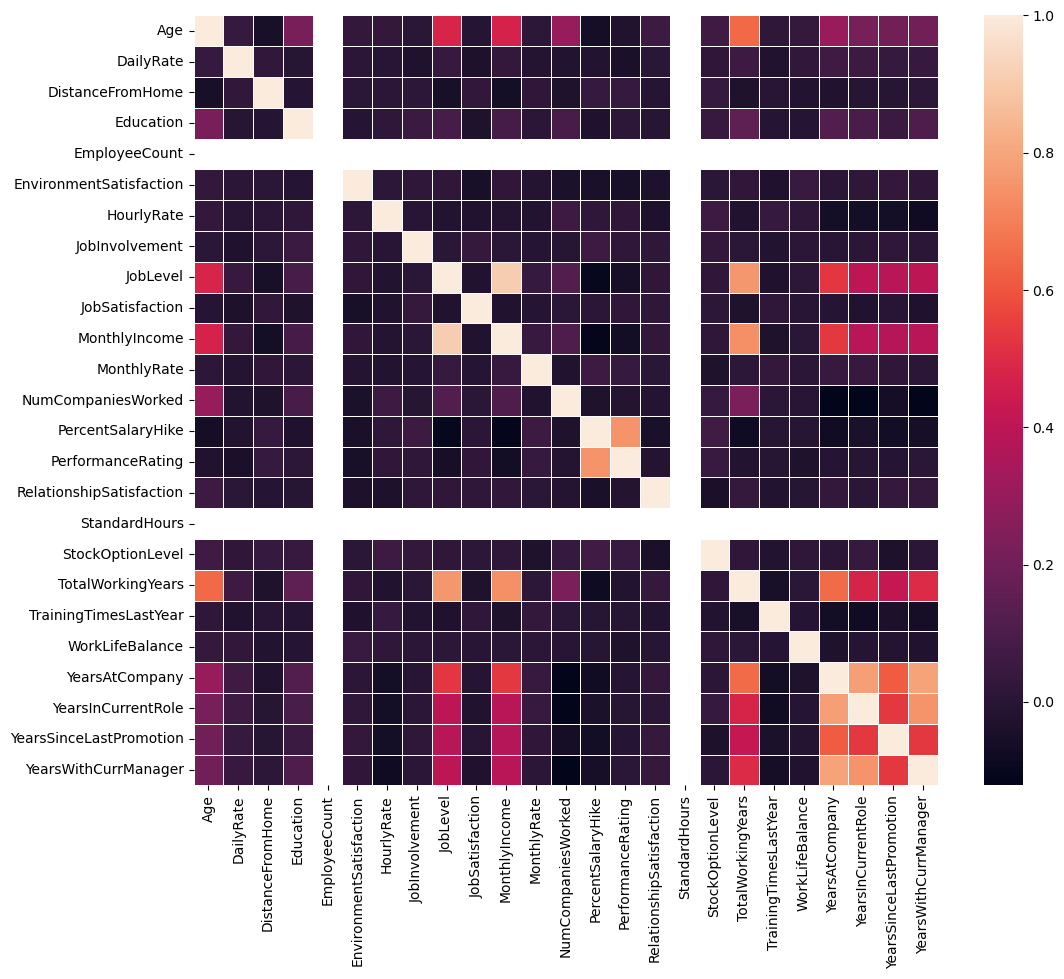

In [13]:
#sns.heatmap(corr)

plt.figure(figsize=(12, 10))

# Use seaborn's heatmap
sns.heatmap(corr, fmt=".2f", linewidths=.5, annot_kws={"size": 10})

# Show the plot
plt.show()

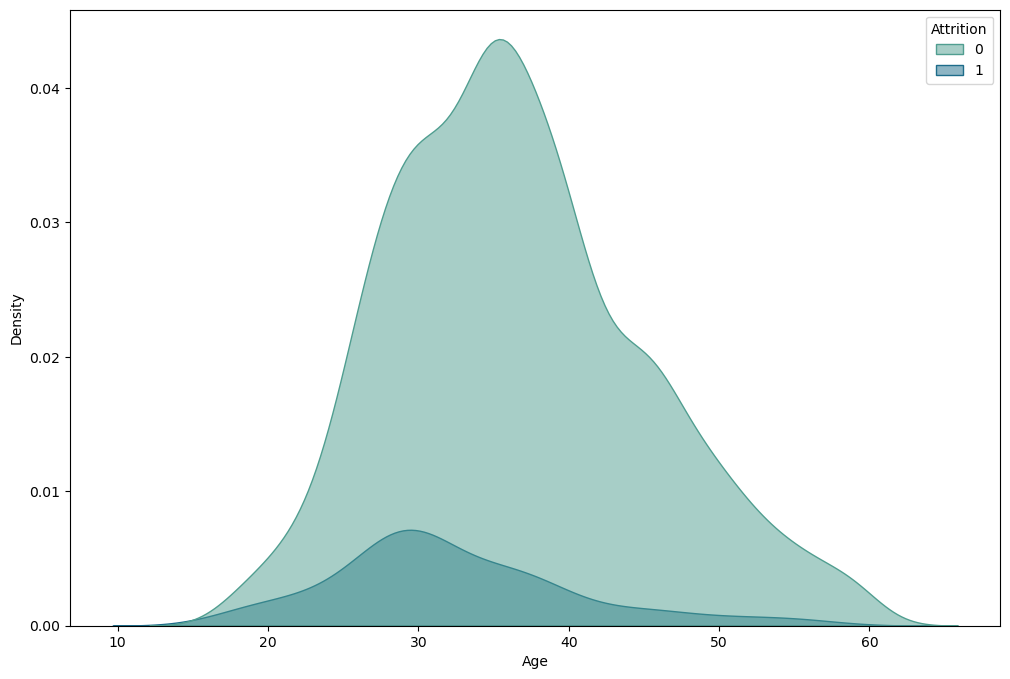

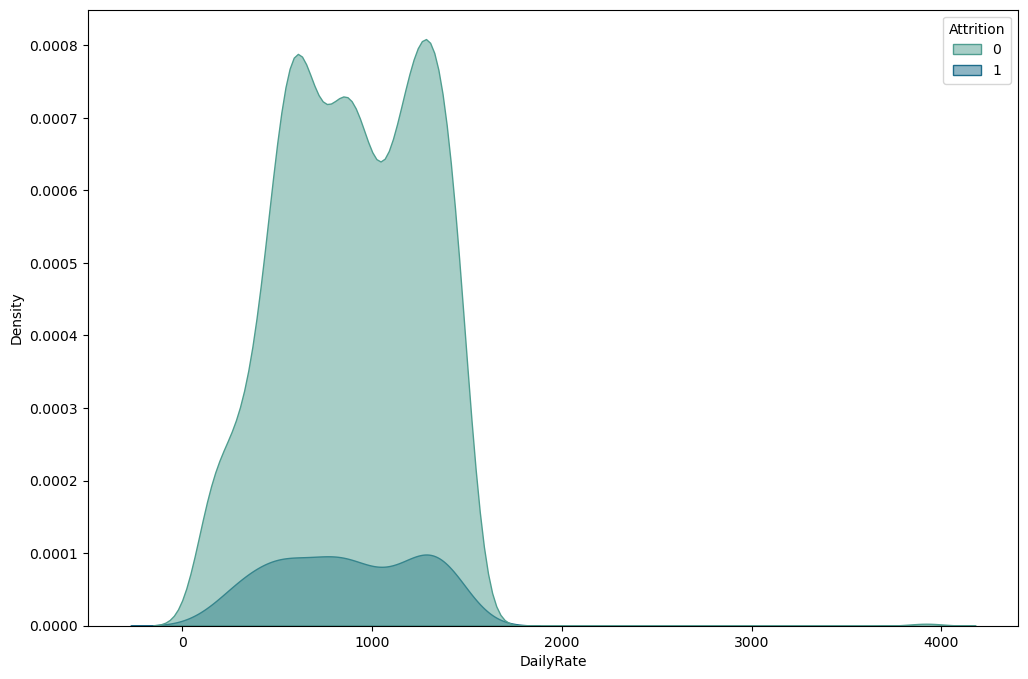

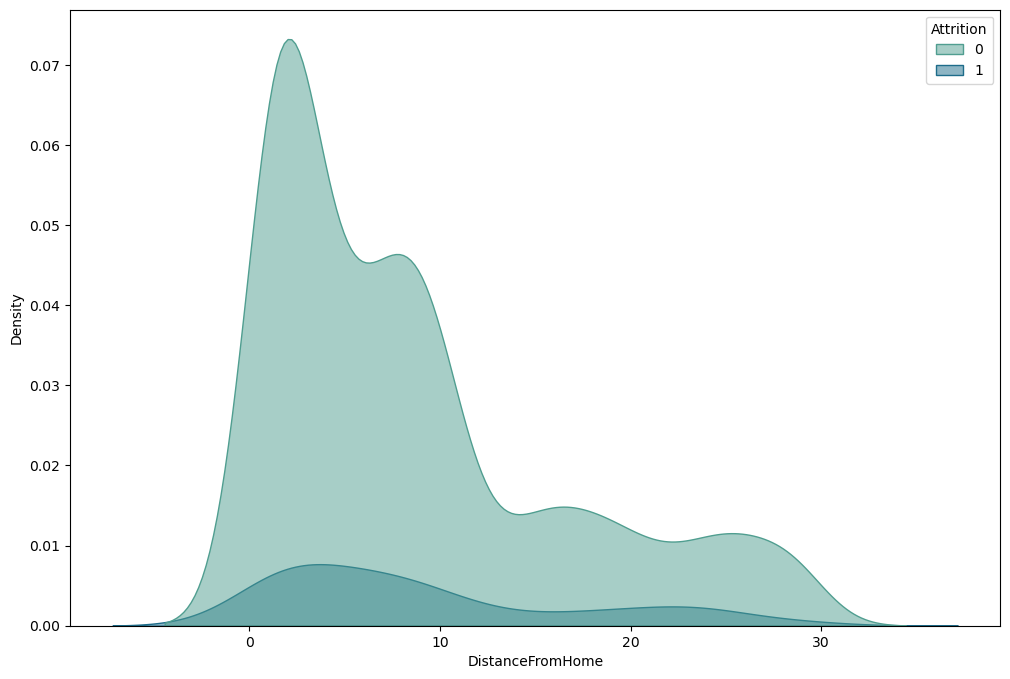

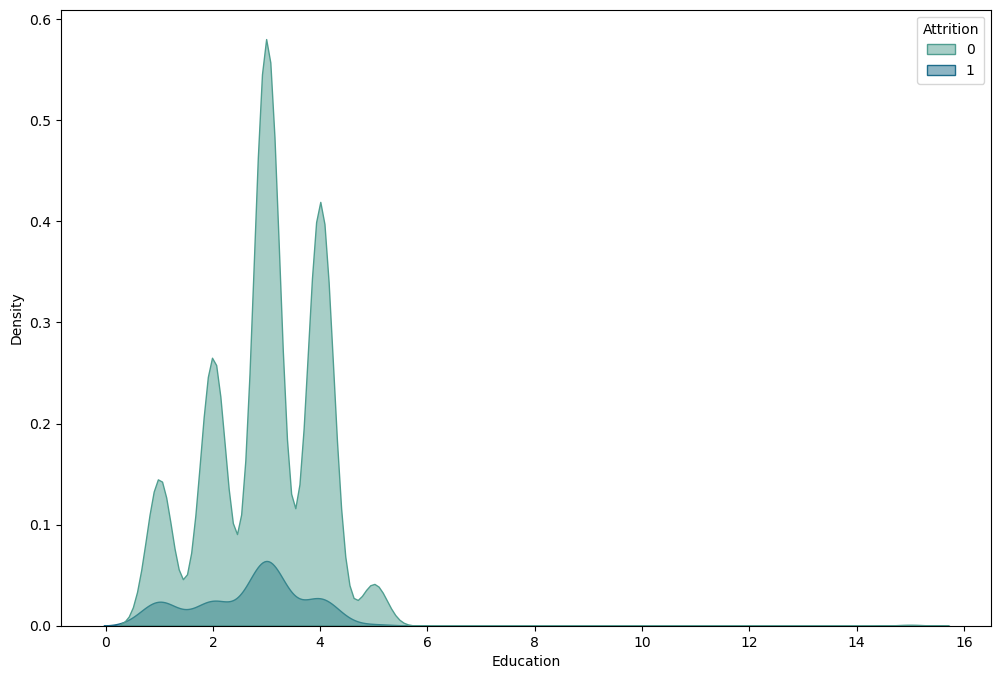

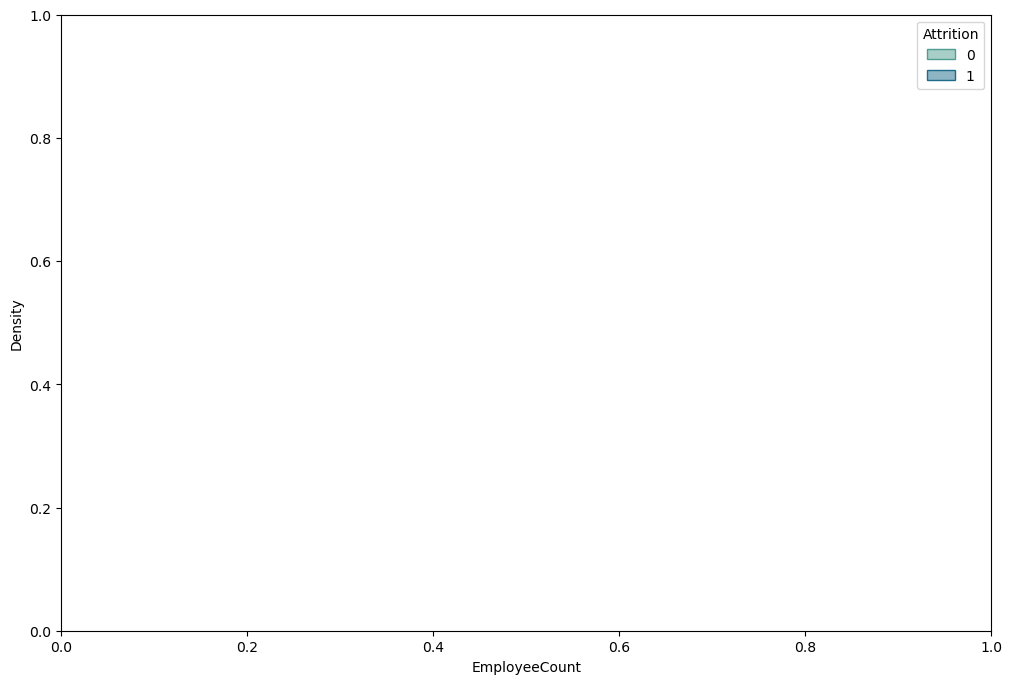

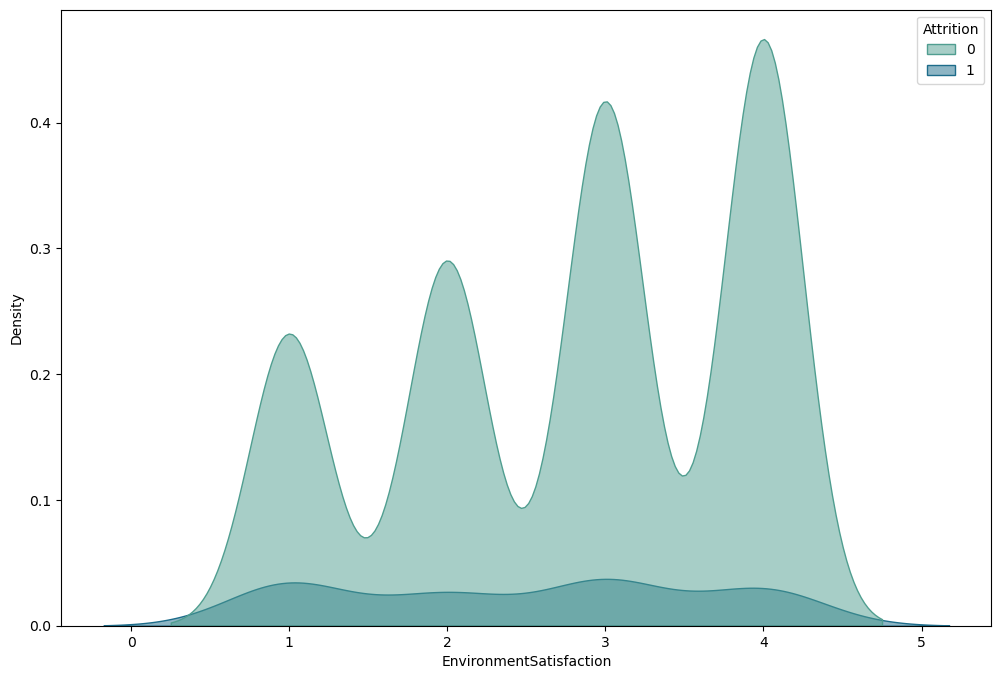

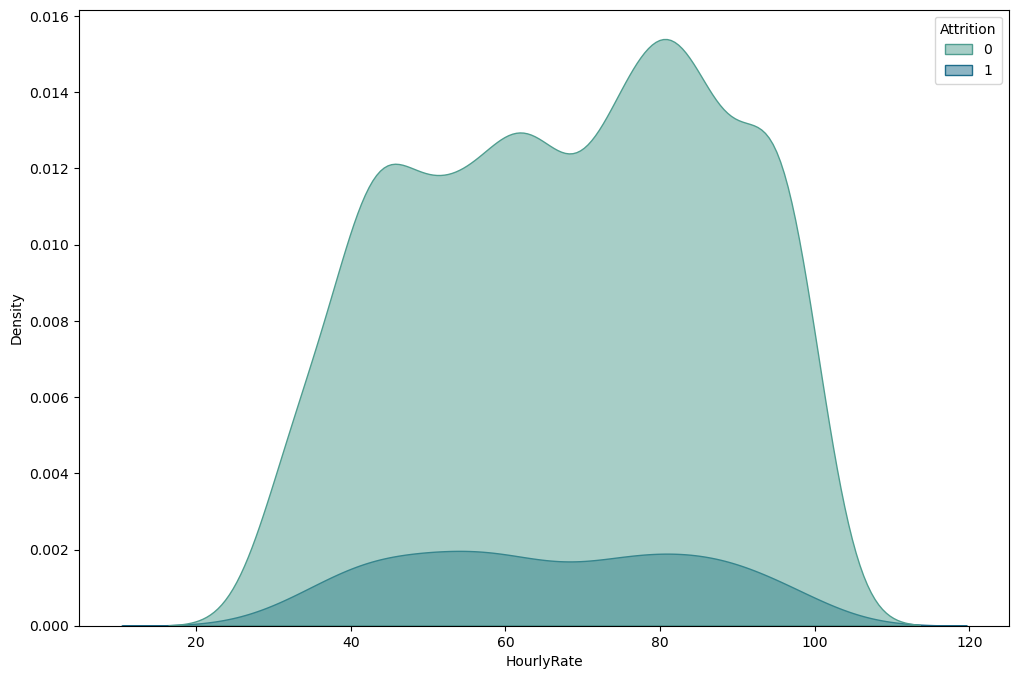

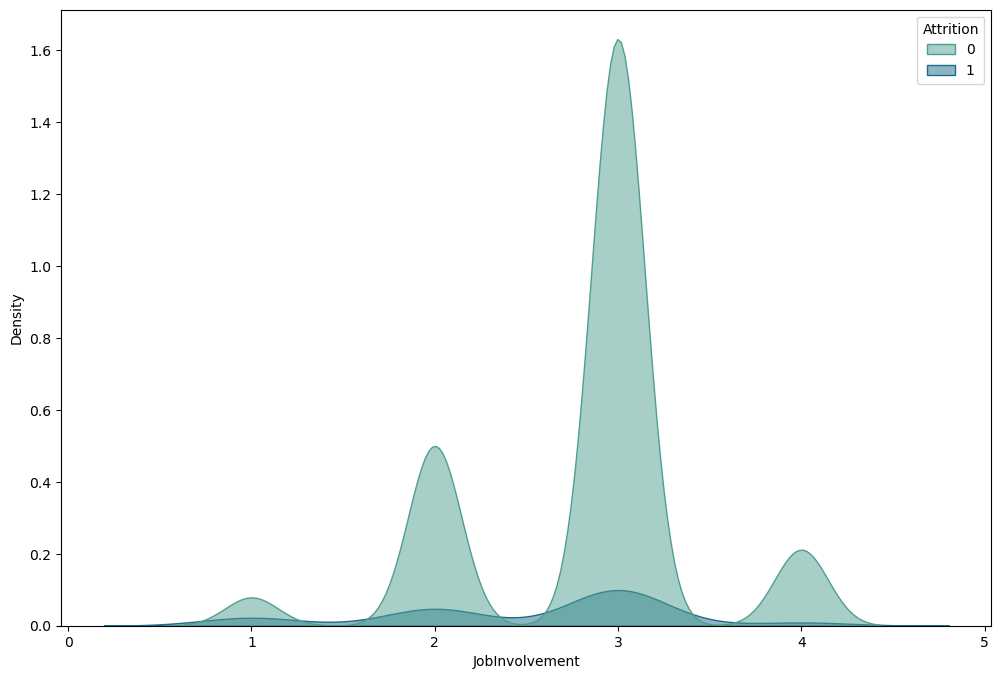

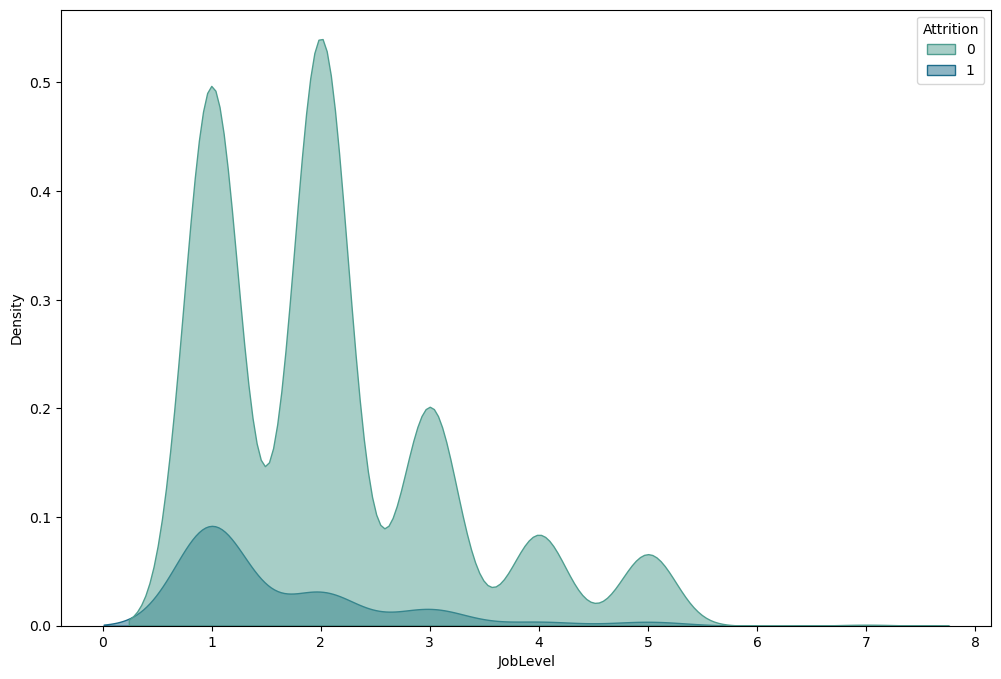

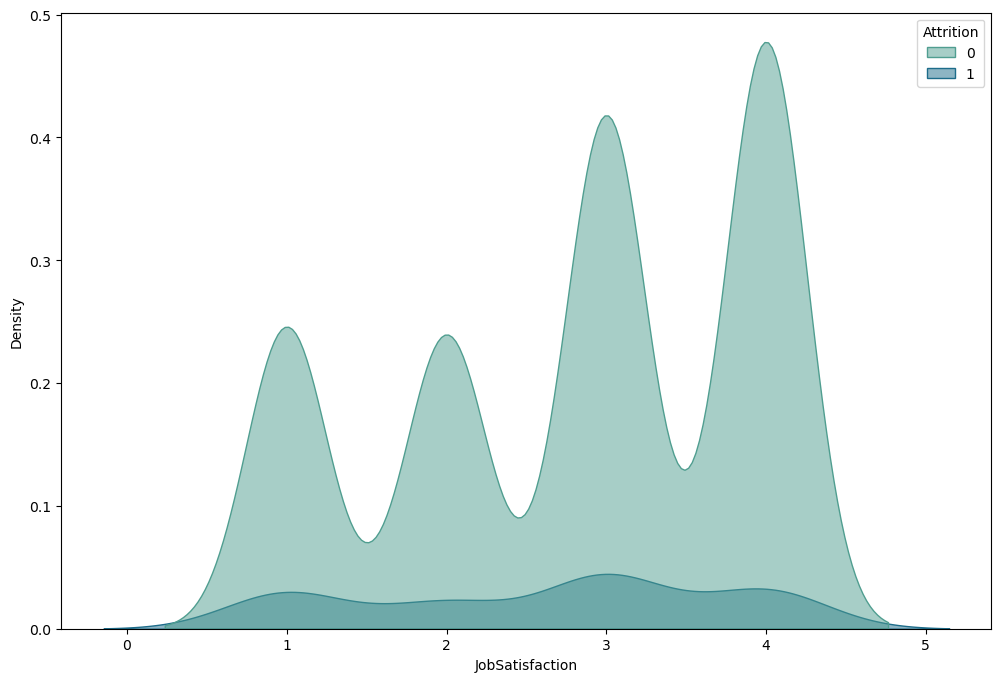

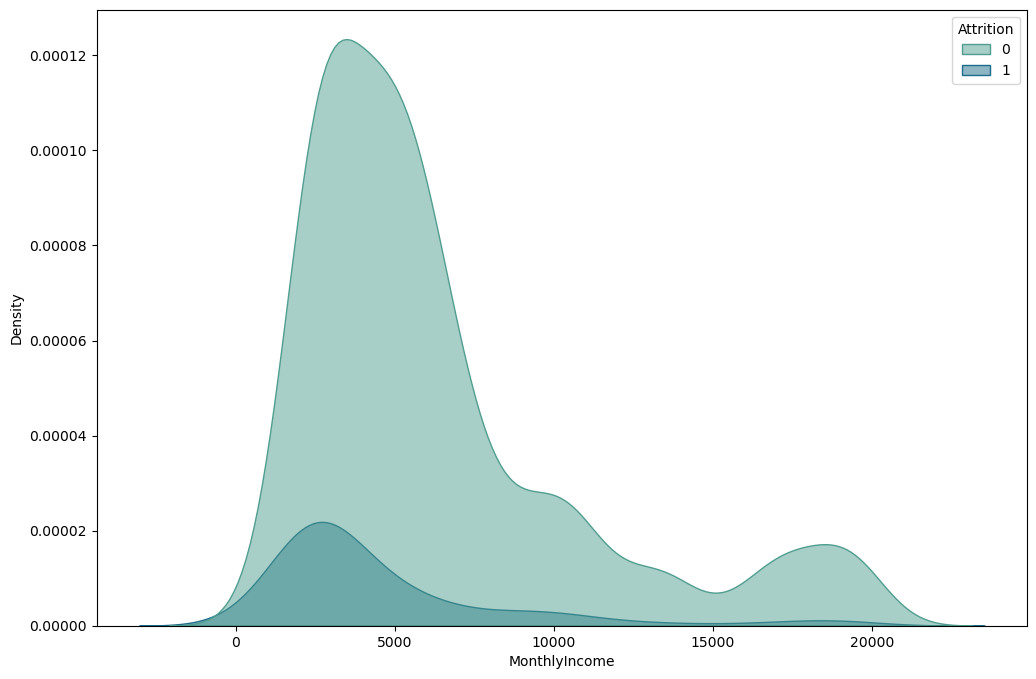

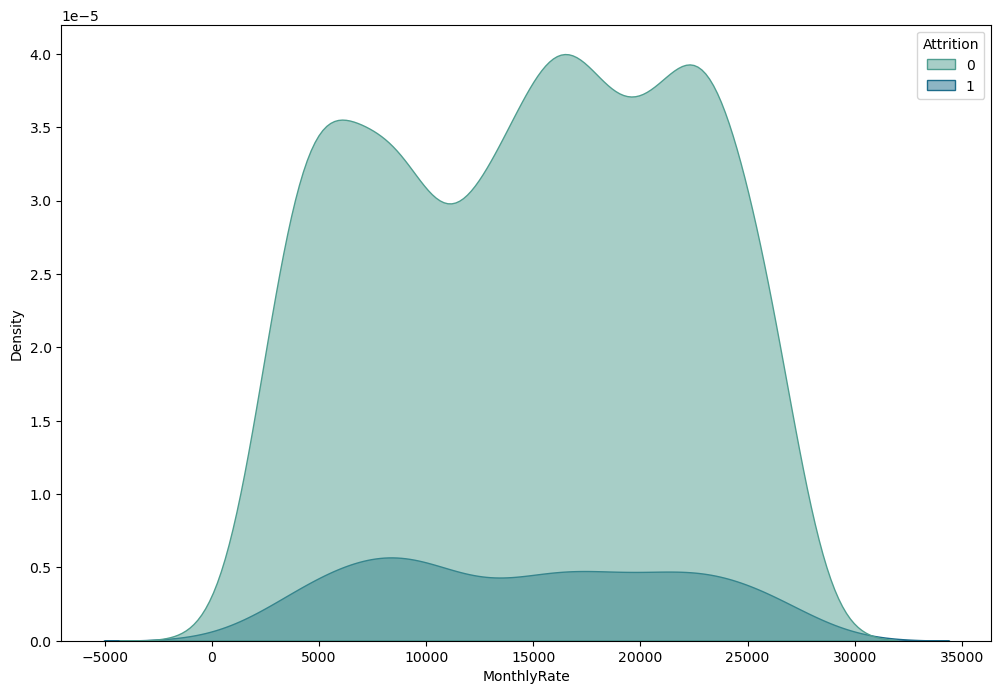

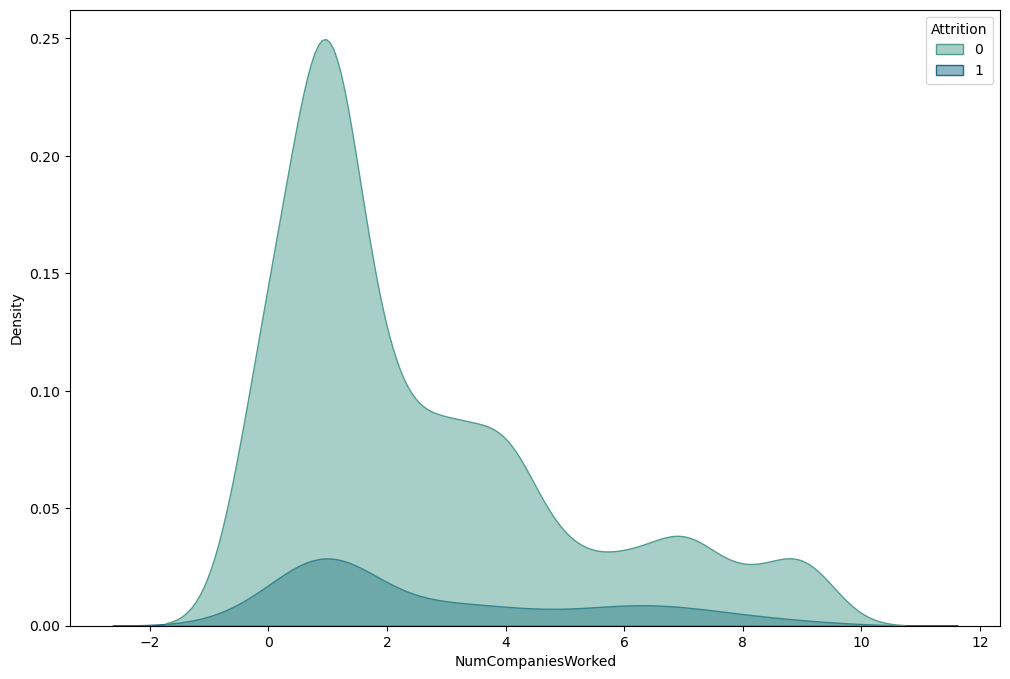

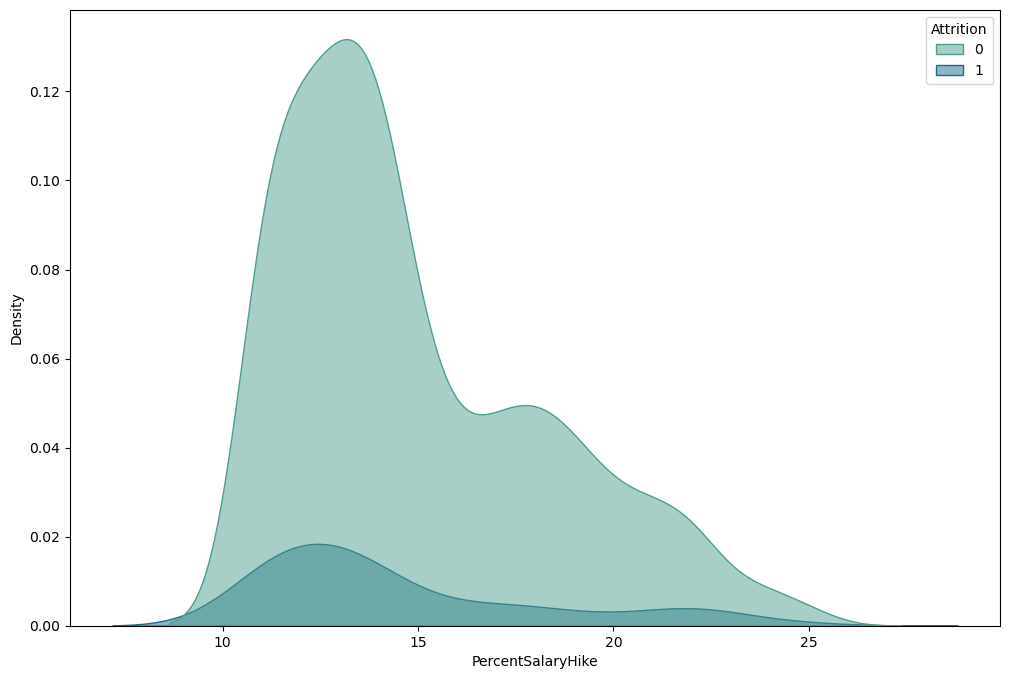

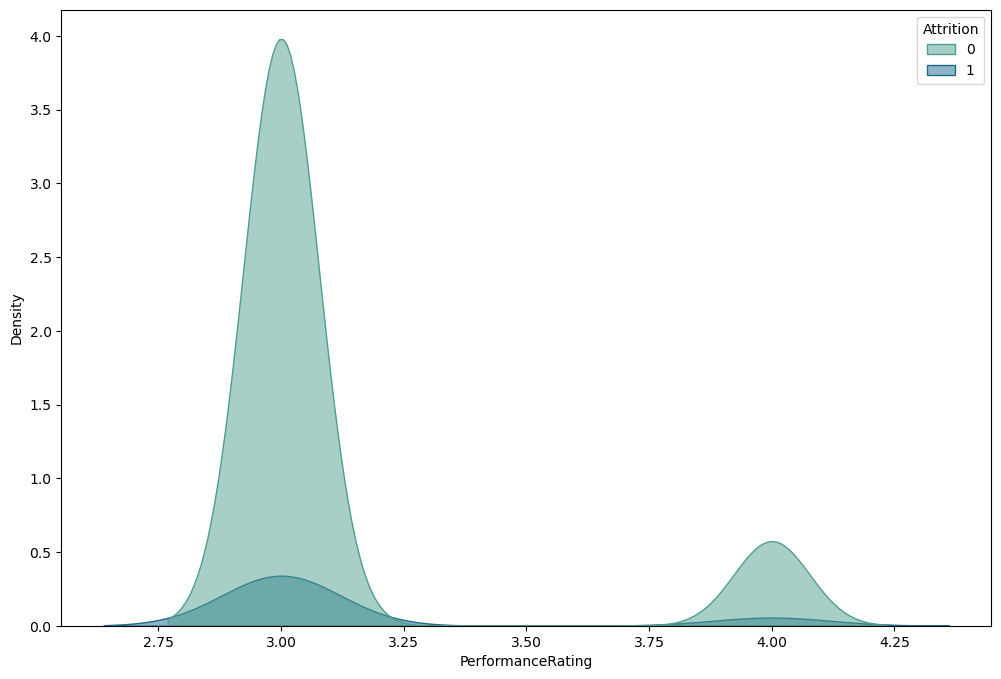

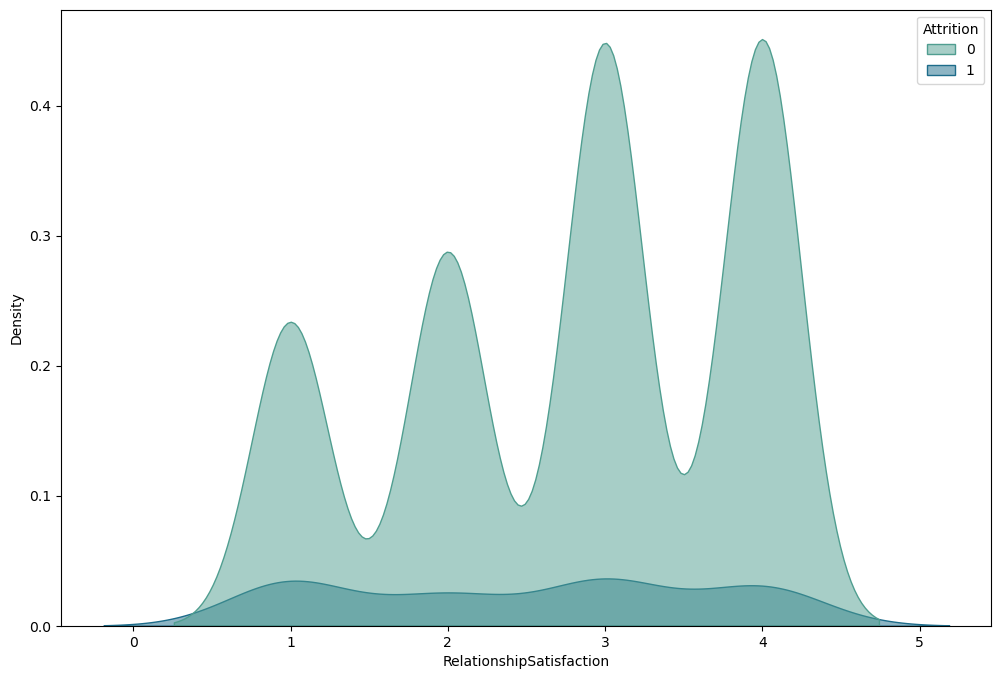

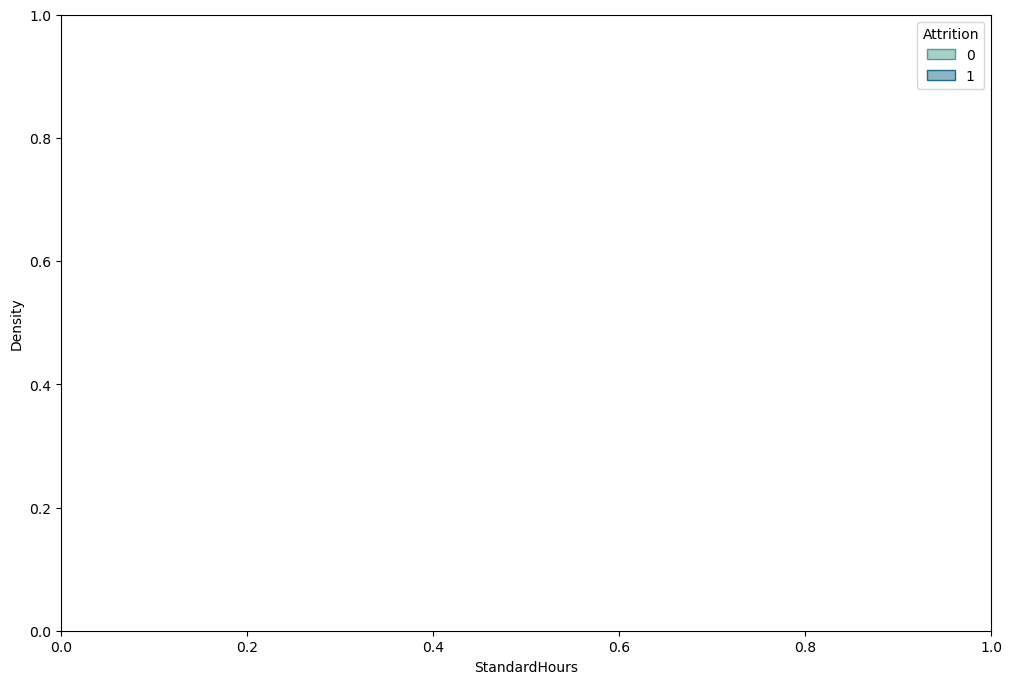

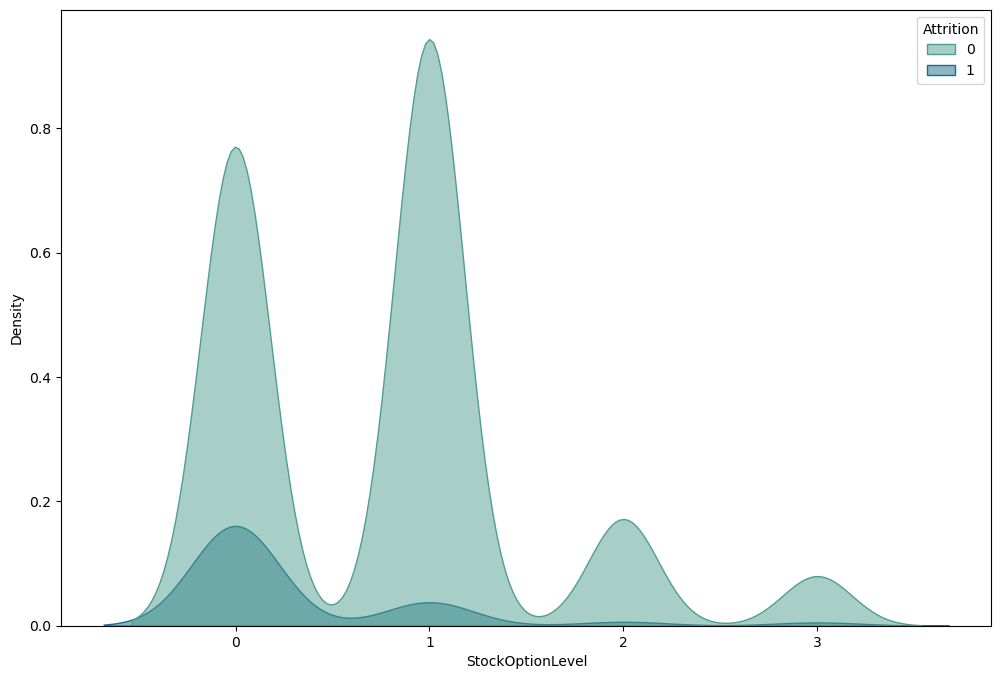

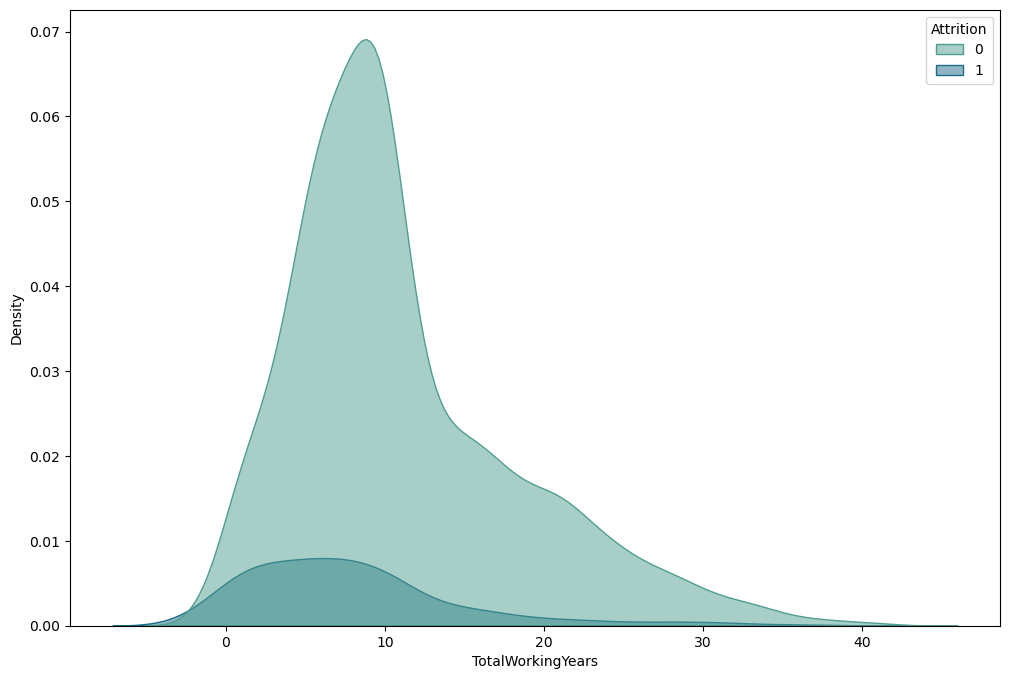

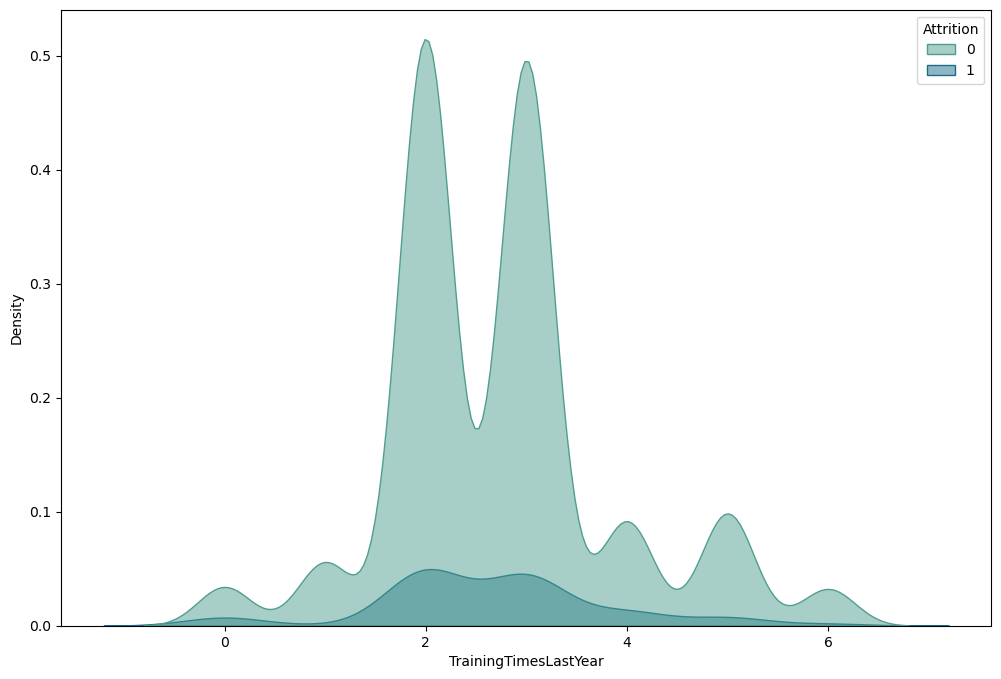

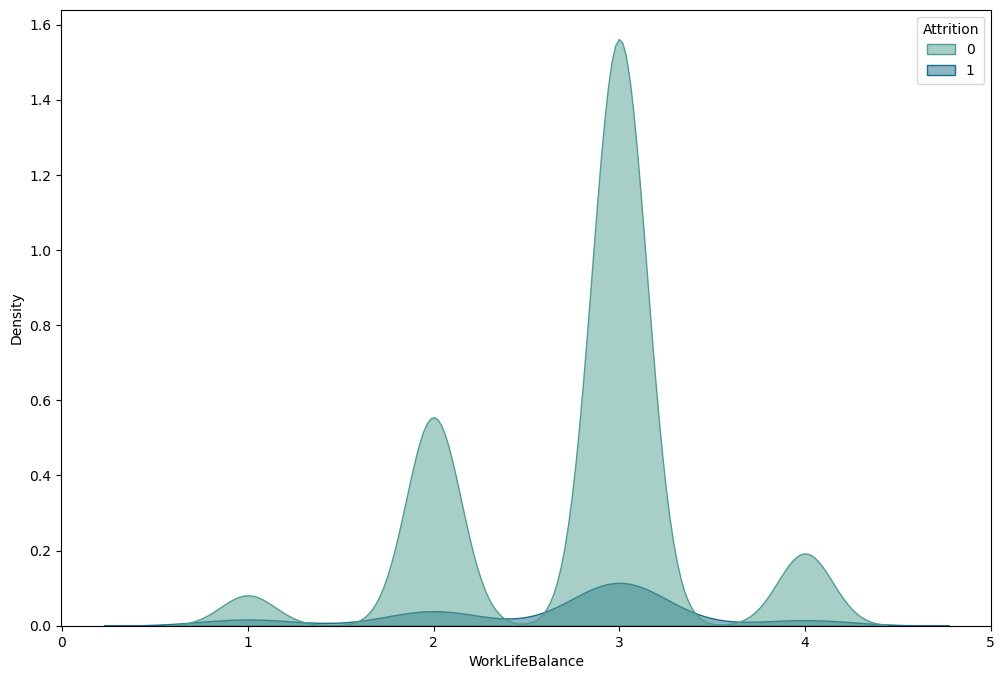

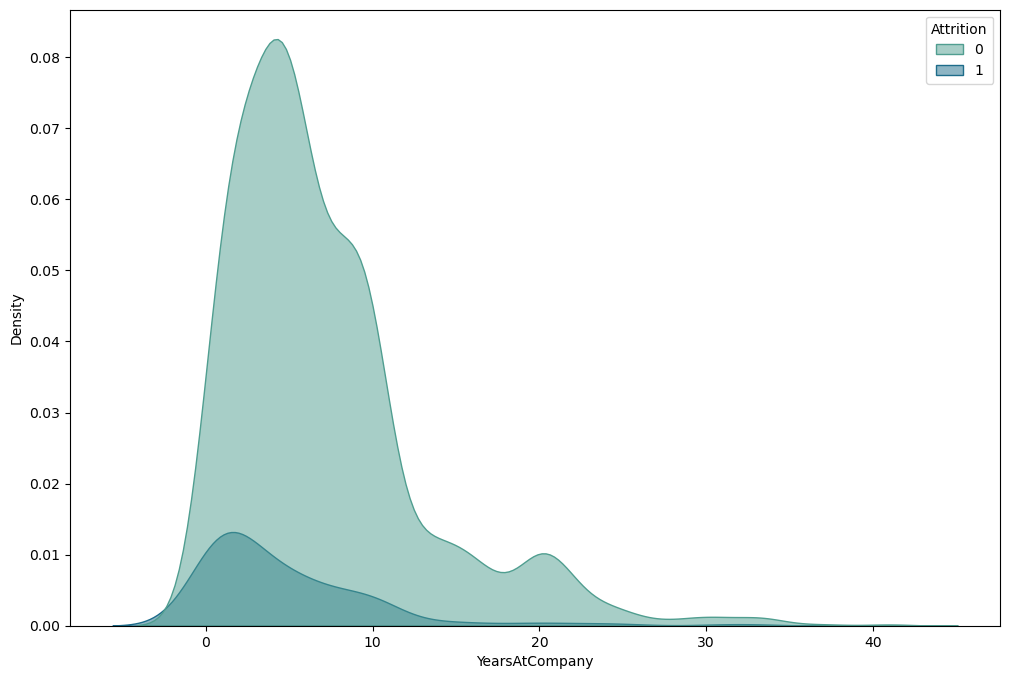

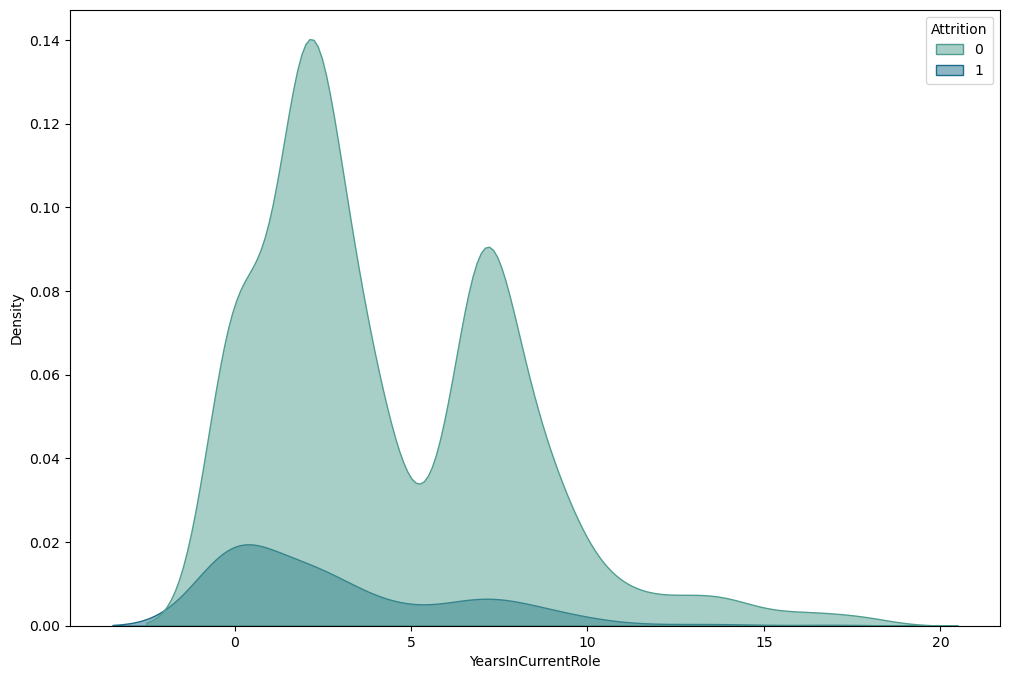

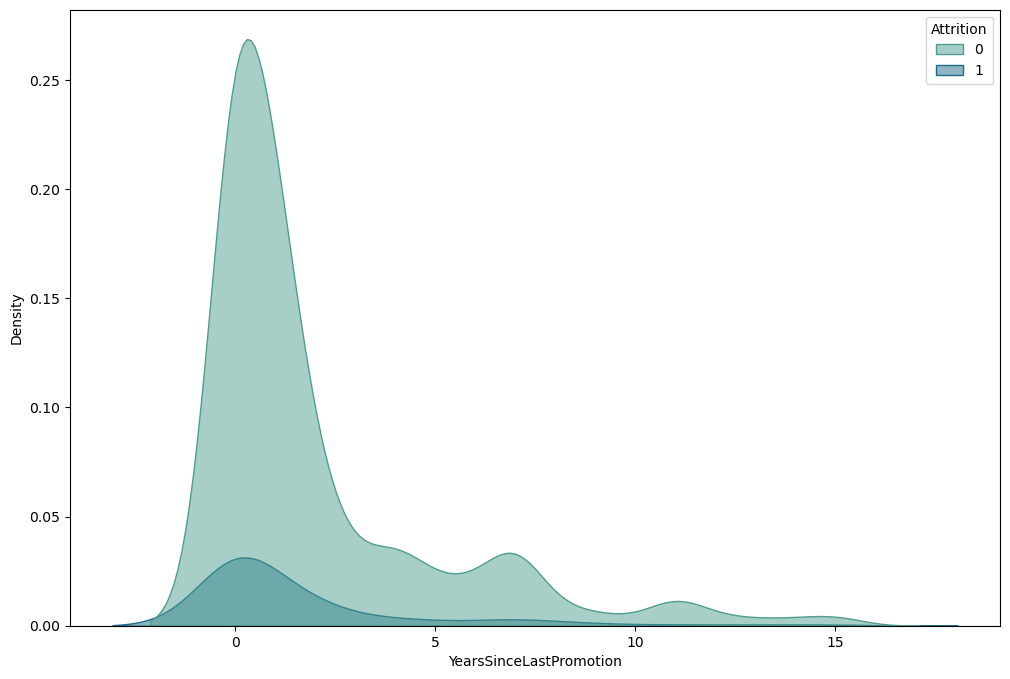

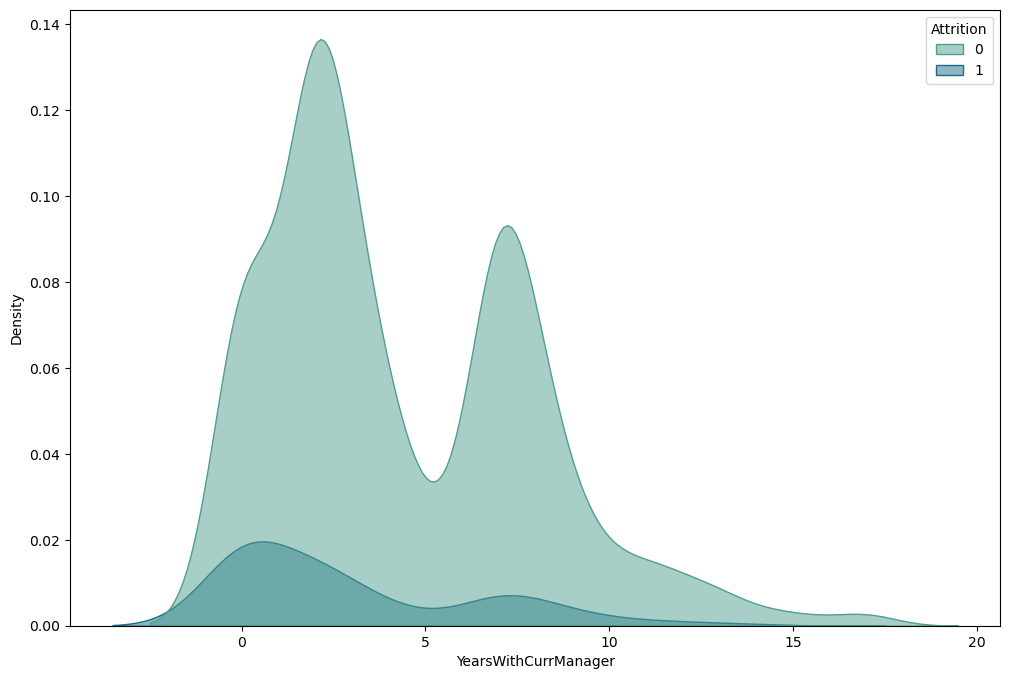

In [8]:
# Show of relationship of Attrition to the numerical features

for cols in df.select_dtypes("number").drop(columns = "Attrition").columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=df, x=cols, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()

In [14]:
# Delete feature with Multicollinearity

del df["EmployeeCount"]
del df["StandardHours"]

In [15]:
# checking Categorical feature with high cardinality

for col in df.select_dtypes("object").columns:
    print(f"{col}: {df[col].nunique()})")

BusinessTravel: 3)
Department: 3)
EducationField: 6)
Gender: 2)
JobRole: 9)
MaritalStatus: 3)
Over18: 1)
OverTime: 2)


<Axes: >

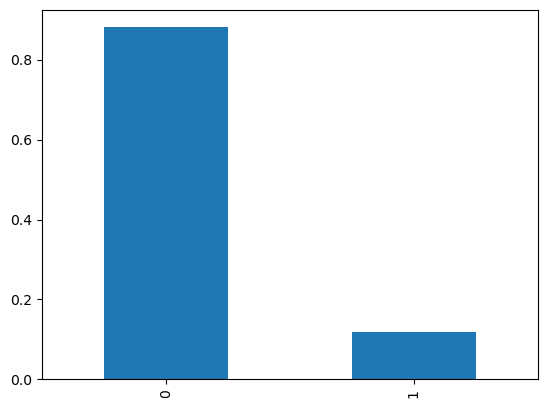

In [16]:
# Checking for Balance in the target variable

df.Attrition.value_counts(normalize = True).plot(kind = "bar")

### Functions used for Project

In [52]:
def wrangle(filename):
    df = pd.read_csv(filename, index_col = "id")

    # Delete feature with high corelation
    del df["EmployeeCount"]
    del df["StandardHours"]
    return df

def prepare_data_split(df, test_size, random_state, target_feature):
    '''
    Function Splits a dataset(df) in the Train/test  dataset

    return the train, Test dataset
    '''
    df_train, df_test = train_test_split(df, test_size= test_size, random_state=random_state)

    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train[target_feature].values
    y_test = df_test[target_feature].values

    del df_train[target_feature]
    del df_test[target_feature]

    print(f"Length of X_train: {len(df_train)}, Length of X_test: {len(df_test)}")
    print(f"Length of y_train: {len(y_train)}, Length of y_test: {len(y_test)}")
    return df_train, y_train, df_test, y_test


def outliers(X, y):
    # Automatically detect ouliers and remove
    lof = LocalOutlierFactor()
    outliers = lof.fit_predict(X)

    # select all rows that are not outliers
    mask = outliers != -1
    X_train, y_train = X[mask], y[mask]
    return X_train, y_train


def cat_encoder(X_train, X_val):
    # Applying the DictVectorizer

    dv = DictVectorizer(sparse = False)

    train_dicts = X_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)

    val_dicts = X_val.to_dict(orient='records')
    X_val = dv.transform(val_dicts)
        
    #Save Encoder to disk
    with open("dicv.pkl", "wb") as f:
        pickle.dump(dv, f)
    return X_train, X_val

def min_max_scaler(X_train, X_val):
    # scale the dataset
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    return X_train, X_val


### Project Main Body

In [53]:
# Load Data

filename = "train.csv"
df = wrangle(filename)

# Setup Validation framework
test_size = 0.2
random_state = 42
target_feature = "Attrition"
X_train, y_train, X_val, y_val = prepare_data_split(df, test_size, random_state, target_feature)

# Apply Encoder to categorical features
X_train, X_val = cat_encoder(X_train, X_val)

# Auto Eliminate Outliers from Training dataset
X_train, y_train = outliers(X_train, y_train)

# Scale the data using MinMaxScaler
X_train, X_val = min_max_scaler(X_train, X_val)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", y_val.shape)


Length of X_train: 1341, Length of X_test: 336
Length of y_train: 1341, Length of y_test: 336
X_train:  (1336, 52)
y_train:  (1336,)
X_val:  (336, 52)
y_val:  (336,)


### Gradient Boosting Classifier Model

In [54]:
print("Training Gradient Boosting Classifier")
print()
clf = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': range(10, 330, 20),
    'max_depth': [None, 5, 15, 25],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42],
    }

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use Auc as the evaluation metric
    cv=5,  # 5-fold cross-validation
    )

# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# Get the best model from the grid search
model_gradientboost = grid_search.best_estimator_

# Make predictions on the test set
y_pred_proba = model_gradientboost.predict_proba(X_val)[:, 1]

# Calculate AUC on the Validation set
auc_gradientboost_proba = roc_auc_score(y_val, y_pred_proba)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print()
print("AUC on Validation Set Proba:", auc_gradientboost_proba)

Training Gradient Boosting Classifier

Best Hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 90, 'random_state': 42}

AUC on Validation Set Proba: 0.8370952677459527


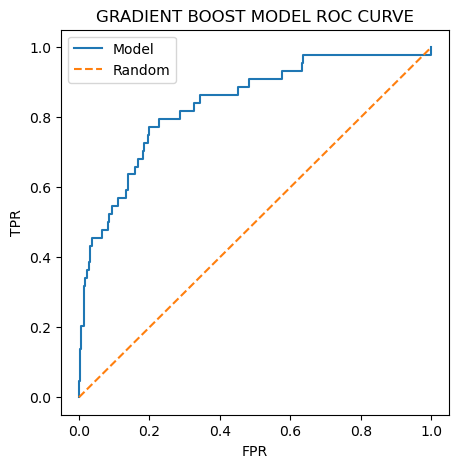

In [55]:
y_pred = model_gradientboost.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.title("GRADIENT BOOST MODEL ROC CURVE")
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

### Decision Tree Classifier Model

In [56]:
print("Training Decision Tree Classifier")
print()

clf = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'max_depth': [5, 10, 15, 25],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42],
    }
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use Auc as the evaluation metric
    cv=5,  # 5-fold cross-validation
    )

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
model_decisiontree = grid_search.best_estimator_

# Make predictions on the test set
y_pred_proba = model_decisiontree.predict_proba(X_val)[:, 1]

# Calculate AUC on the Validation set
auc_decisiontree_proba = roc_auc_score(y_val, y_pred_proba)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print()
print("AUC on Validation Set Proba:", auc_decisiontree_proba)

Training Decision Tree Classifier

Best Hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}

AUC on Validation Set Proba: 0.6688589663760897


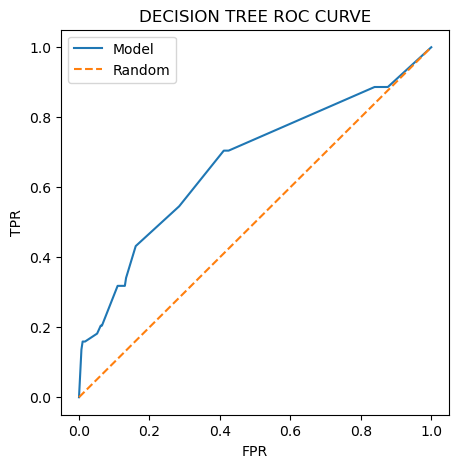

In [57]:
y_pred = model_decisiontree.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.title("DECISION TREE ROC CURVE")
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

### XGBoost Classifier Model

In [58]:
print("Training XGBoost Classifier")
print()

clf = XGBClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': range(10, 330, 20),
    'max_depth': [None, 5, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.1, 0.2 ],
    'random_state': [42],
    }
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use Auc as the evaluation metric
    cv=5,  # 5-fold cross-validation
    )

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
model_xgboost = grid_search.best_estimator_

# Make predictions on the test set
y_pred_proba = model_xgboost.predict_proba(X_val)[:, 1]

# Calculate AUC on the Validation set
auc_xgboost_proba = roc_auc_score(y_val, y_pred_proba)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print()
print("AUC on Validation Set Proba:", auc_xgboost_proba)

Training XGBoost Classifier

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 30, 'random_state': 42}

AUC on Validation Set Proba: 0.8032378580323786


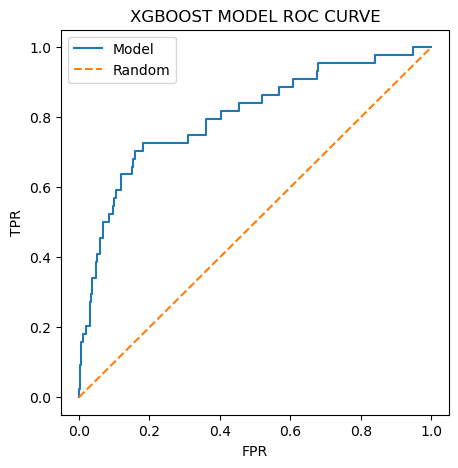

In [59]:
y_pred = model_xgboost.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.title("XGBOOST MODEL ROC CURVE")
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

### RANDOM FOREST CLASSIFIER MODEL

In [60]:
print("RANDOM FOREST CLASSIFIER")
print()

clf = RandomForestClassifier()

# Define the parameter grid for hyperparameter tuning.
param_grid = {
    'n_estimators': range(10, 300, 20),
    'max_depth': [None, 5, 10, 15, 20, 25],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    }

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    scoring='roc_auc',  # Use Auc as the evaluation metric
    cv=5,  # 5-fold cross-validation
    )

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
model_randomforest = grid_search.best_estimator_

# Make predictions on the test set
y_pred_proba = model_randomforest.predict_proba(X_val)[:, 1]

# Calculate AUC on the Validation set
auc_randomforest_proba = roc_auc_score(y_val, y_pred_proba)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print()
print("AUC on Validation Set Proba:", auc_randomforest_proba)

RANDOM FOREST CLASSIFIER

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 210, 'random_state': 42}

AUC on Validation Set Proba: 0.8135896637608967


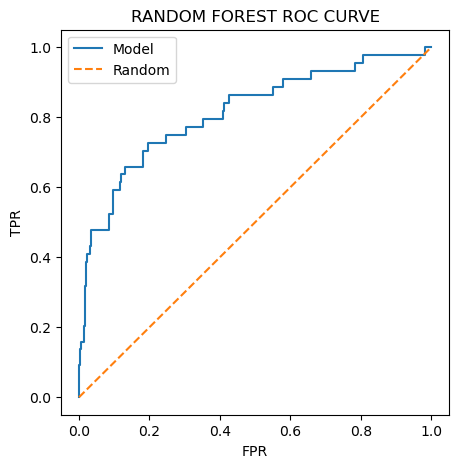

In [61]:
y_pred = model_randomforest.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.title("RANDOM FOREST ROC CURVE")
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend();

Gradient Boosting Classifier model was selected as the best model and based on the criteria of
having the best AUC. AUC was used for evaluation in the project with the best hyper parameters

In [62]:
# Save the best model selected

with open("best_model_capst.pkl", "wb") as f:
    pickle.dump(model_gradientboost, f)

In [32]:
df.iloc[20] # Selected Data point for deployment testing

Age                                             30
BusinessTravel                       Travel_Rarely
DailyRate                                     1392
Department                  Research & Development
DistanceFromHome                                 7
Education                                        4
EducationField                       Life Sciences
EnvironmentSatisfaction                          2
Gender                                        Male
HourlyRate                                      77
JobInvolvement                                   4
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  2
MaritalStatus                             Divorced
MonthlyIncome                                 2413
MonthlyRate                                  26314
NumCompaniesWorked                               1
Over18                                           Y
OverTime                       

In [63]:

staff = {
    "Age": 30,
    "BusinessTravel": "Travel_Rarely",
    "DailyRate": 1392,
    "Department": "Research & Development",
    "DistanceFromHome": 7,
    "Education": 4,
    "EducationField": "Life Sciences",
    "EnvironmentSatisfaction":2,
    "Gender": "Male",
    "HourlyRate": 77,
    "JobInvolvement": 4,
    "JobLevel": 1,
    "JobRole": "Research Scientist",
    "JobSatisfaction": 2,
    "MaritalStatus": "Divorced",
    "MonthlyIncome": 2413,
    "MonthlyRate": 26314,
    "NumCompaniesWorked": 1,
    "Over18": "Y",
    "OverTime": "Yes",
    "PercentSalaryHike": 18,
    "PerformanceRating": 3,
    "RelationshipSatisfaction": 3,
    "StockOptionLevel": 1,
    "TotalWorkingYears": 10,
    "TrainingTimesLastYear": 3,
    "WorkLifeBalance": 2,
    "YearsAtCompany": 10,
    "YearsInCurrentRole": 7,
    "YearsSinceLastPromotion": 0,
    "YearsWithCurrManager": 1
}

#Attrition                                        0
